In [20]:
import GPy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [21]:
def read_data(filename: str):
    """read the data from csv file

    Returns:
    """
    _file = open(filename, "r")
    df: pd.DataFrame = pd.read_csv(_file)
    return df
df_raw = read_data("./data_silce/building_0_floor_0.csv")

In [22]:
def clean_data_nd(df: pd.DataFrame):
    """Remove the duplicate data from the dataframe

    Args:

    Returns:
        pd.Dataframe: the cleaned data
    """
    df_sub = df[["WAP007", "WAP008", "WAP009",
                 "WAP010", "LONGITUDE", "LATITUDE"]]
    df_sub.groupby(["LONGITUDE", "LATITUDE"]).size(
    ).reset_index().rename(columns={0: "count"})
    # d = {"LONGITUDE": "LONGITUDE", "LATITUDE": "LATITUDE", "WAP007": "WAP007"}
    # df = df_sub.groupby(["LONGITUDE", "LATITUDE"]).agg({"WAP007": "mean"})
    df = df_sub.groupby(["LONGITUDE", "LATITUDE"],
                        as_index=False).aggregate({"WAP007": "mean", "WAP008": "mean", "WAP009": "mean", "WAP010": "mean"})
    return df

In [23]:
df = clean_data_nd(df_raw)

In [24]:
def modeling_nd(xy: np.ndarray, z: np.ndarray):
    # kernel = GPy.kern.RBF(1,lengthscale=1, ARD = True)**GPy.kern.Coregionalize(input_dim=1,output_dim=4, rank=1)

    # kernel = GPy.util.multioutput.ICM(
    kernel = GPy.util.multioutput.ICM(
        input_dim=2, num_outputs=4, kernel=GPy.kern.RBF(2))
    print(f"kernel:\n{kernel}")
    print(f"xy.shape:{xy.shape}")
    print(f"z.shape:{z.shape}")
    m = GPy.models.GPCoregionalizedRegression(
        np.array([xy]), np.array([z]), kernel=kernel)
    print(f"model:\n{m}")
    m.optimize(messages=True)
    m.optimize_restarts(num_restarts=10)
    return m


In [25]:
def generate_data_nd(df):
    xy = df[["LONGITUDE", "LATITUDE"]].to_numpy().T
    z = df[["WAP007", "WAP008", "WAP009", "WAP010"]].to_numpy().T
    return xy, z

In [26]:
xy, z = generate_data_nd(df)
m = modeling_nd(xy.T, z.T)

kernel:
  ICM.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  B.W              |  (4, 1)  |               |        
  B.kappa          |    (4,)  |      +ve      |        
xy.shape:(54, 2)
z.shape:(54, 4)
model:

Name : gp
Objective : 788505.0551896038
Number of Parameters : 11
Number of Optimization Parameters : 11
Updates : True
Parameters:
  gp.                                    |   value  |  constraints  |  priors
  ICM.rbf.variance                       |     1.0  |      +ve      |        
  ICM.rbf.lengthscale                    |     1.0  |      +ve      |        
  ICM.B.W                                |  (4, 1)  |               |        
  ICM.B.kappa                            |    (4,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |     1.0  |      +ve      |        
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f     

 /home/aruix/aruixDAO/Code/gaussian_process/venv/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Optimization restart 4/10, f = 559.4846250691214
Optimization restart 5/10, f = 559.4846250706536
Optimization restart 6/10, f = 559.4846250715353
Optimization restart 7/10, f = 559.4846250739134
Optimization restart 8/10, f = 559.4846250739979
Optimization restart 9/10, f = 559.484625069287
Optimization restart 10/10, f = 559.4846250692351


In [29]:
def increase_pred_input_nd(num, lim):
    """generate input value to prediction, which base on uniform random

    Args:
        num (int): the number of generating
        kwarg:  
            x_min = kwarg["x_min"]
            x_max = kwarg["x_max"]
            y_min = kwarg["y_min"]
            y_max = kwarg["y_max"]

    Returns:
        np.ndarray: a 2*num array
    """
    x_min = lim["x_min"]
    x_max = lim["x_max"]
    y_min = lim["y_min"]
    y_max = lim["y_max"]
    l = []
    for _ in range(num):
        l.append(
            [random.uniform(x_min, x_max), random.uniform(y_min, y_max), 0]
        )
    xy = np.array(l)
    return xy



In [30]:
# xy_pred = np.array([xy[0].min(), xy[1].min(), 0,
#                    xy[0].max(), xy[1].max(), 0]).reshape(-1, 3)

# xy_pred = np.array([xy[0].min(), xy[1].min(), 0,
#                    xy[0].max(), xy[1].max(), 0]).reshape(-1, 3)
limitation = {
    "x_min": xy[0].min(), "x_max": xy[0].max(),
    "y_min": xy[1].min(), "y_max": xy[1].max()
}
xy_pred = increase_pred_input_nd(1000, limitation)


In [31]:
xy_pred[:,-1:]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [34]:
z_pred_raw = m.predict(xy_pred, Y_metadata={
                   "output_index": xy_pred[:, -1].astype(int)})
# z_pred = m.predict(xy_pred, Y_metadata={
#                    "output_index": xy_pred[:, -1].astype(int)})
# z_pred = m.predict(xy_pred)


In [41]:
z_pred = z_pred_raw[0][:,0]


array([[  -7642.78899824, 4864973.74070701],
       [  -7587.85406179, 4864941.3174715 ],
       [  -7634.35733235, 4864904.56607475],
       ...,
       [  -7639.42207307, 4864929.91688696],
       [  -7678.22478393, 4864902.76136432],
       [  -7674.86074121, 4864987.89482388]])

In [37]:
def plot(xy, z, xy_pred, z_pred):
    """plot real data and predicted data

    Args:
        xy (np.ndarray): real data x and y coordination
        z (np.ndarray): real data rss
        xy_pred (np.ndarray): prediction x and y coordication
        z_pred (np.ndarray): prediction rss
    """
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # ax.plot3D(x, y, z, 'gray')
    ax.scatter(xy[0], xy[1], z, c=z, cmap='Greys', label="WAP007")
    ax.scatter(xy_pred[0], xy_pred[1], z_pred,
               c=z_pred, cmap='hsv', label="pred")
    plt.legend(loc='upper left')
    plt.show()


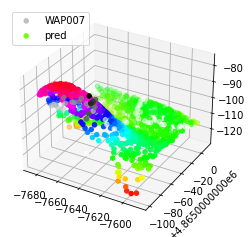

In [48]:
a = xy_pred[:, :-1].T
b = z_pred[:, np.newaxis].T
c = z[0]
plot(xy, c, a, b)
